In [1]:
from IPython.display import Image

### The component of this project

**DQN: ** We changed a DQN network to give us the action-values for a given policy.

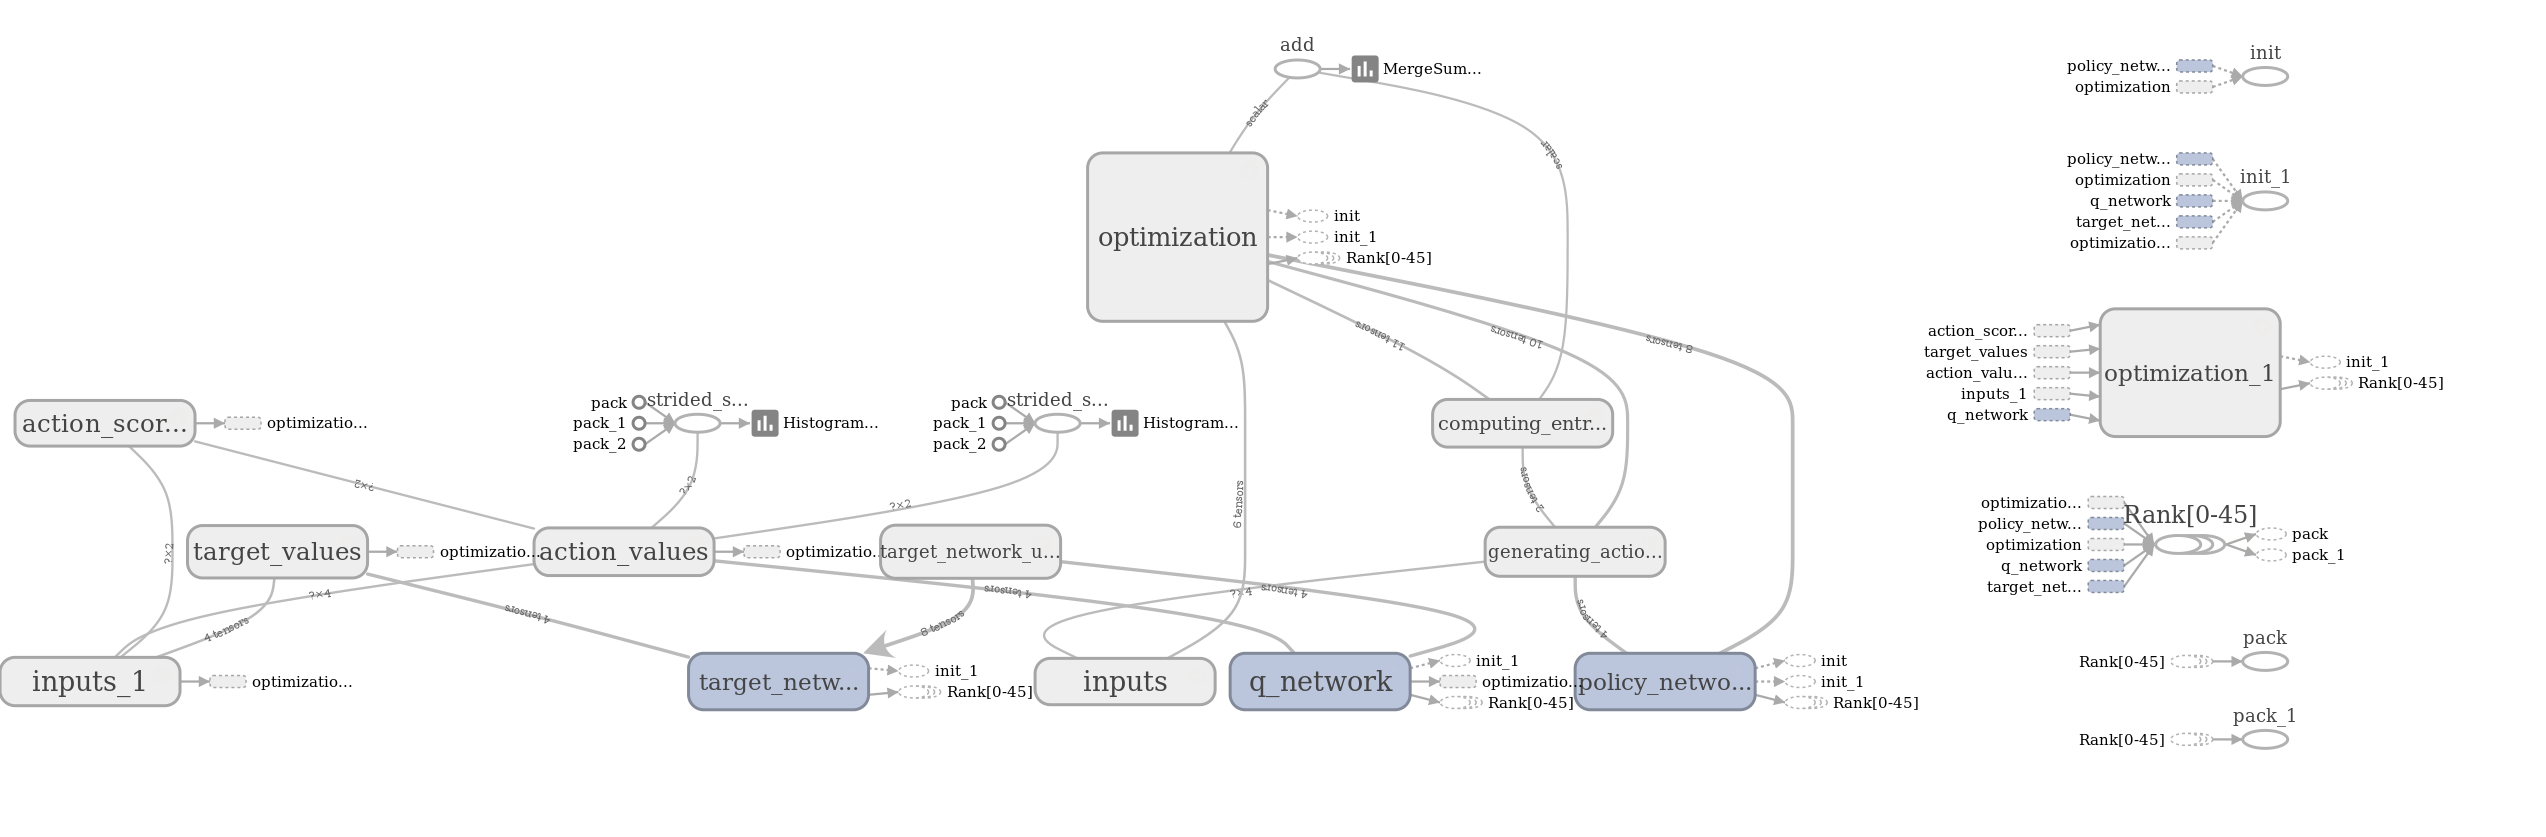

In [2]:
Image(filename="figures/q_network.png")

**Policy Network:** We used a policy network to generate actions for a given state.

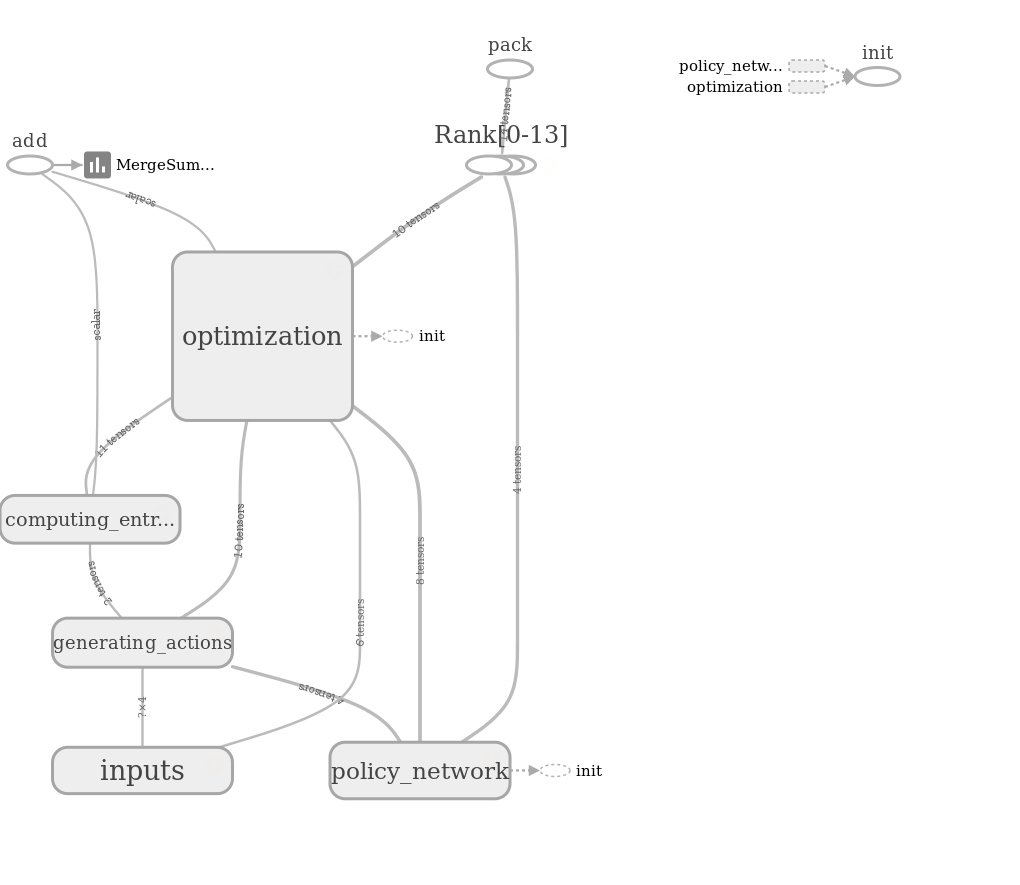

In [5]:
Image(filename="figures/policy_network.png", width=800)

**Sampler: ** The sampler is used to generate trajectories from a given policy.

** Target Network ** is used to make the learning stable.

** Replay Buffer ** is used to efficiently used the past data and reduce the correlation between training examples for DQN. 

# Work Flow

1. Define a policy arbitrary.
** Repeat following for 3000 iterations **
    1. Generate $200$ trajectories using Sampler.
    2. Put those trajectories in Replay Buffer.
    3. Get $2^{13}$ samples from replay buffer. Each samples consist of (state, action, reward, next_state, done).
    4. Use the policy network to obtain the probabilities of actions for `next_state`.
    5. Feed all of these samples to DQN. Each samples consists of (state, action, reward, next_state, done, `next_actions_probabilities`)
    6. Use the TD rule to update the parameters for Q-learning:
    $$
    \text{minimize } \sum (r + \gamma \mathbb{E}_{a' \in \pi(\cdot|s')}Q^{\text{target}}(s', a') - Q(s, a) )^2
    $$
    7. ~~Apply the update rule $10$ times with sampe random batch.~~ (It is foolish. It is equivalent to increasing the learning rate by 10.)
    8. Use the Q-network to find the returns for each state in $200$ trajectories.
    9. Use these returns to apply policy gradient with entropy bonus.
    $$
    \text{maximize} \sum(\nabla \pi(a|s,\theta)Q^{\pi}(s, a) + 0.5 \text{Entropy}\left(\pi(.|s,\theta\right))
    $$
    
    
    

### The result of doing this 

I ran the experiments multiple times to be sure they are consistent. 

** The first run **

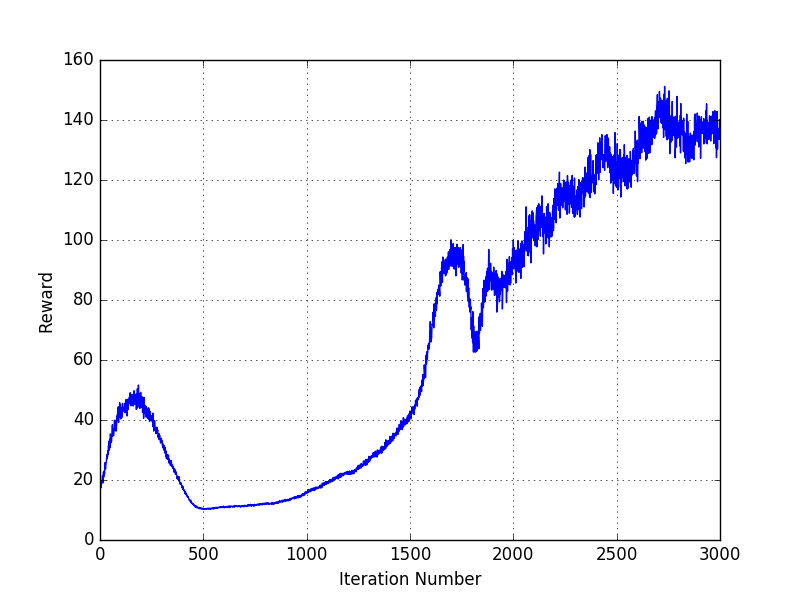

In [8]:
Image(filename="figures/run_1.png")

** The Second Run **

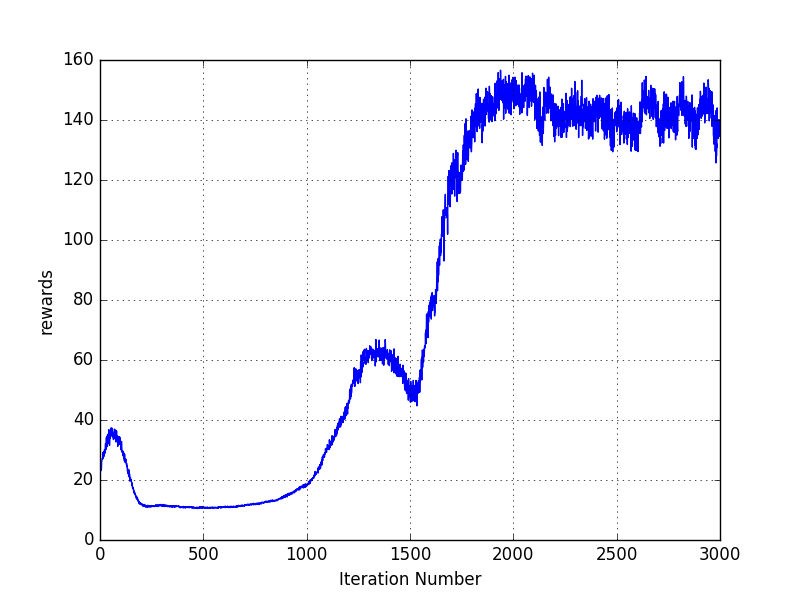

In [10]:
Image(filename="figures/run_2.png")

** The Third Run **

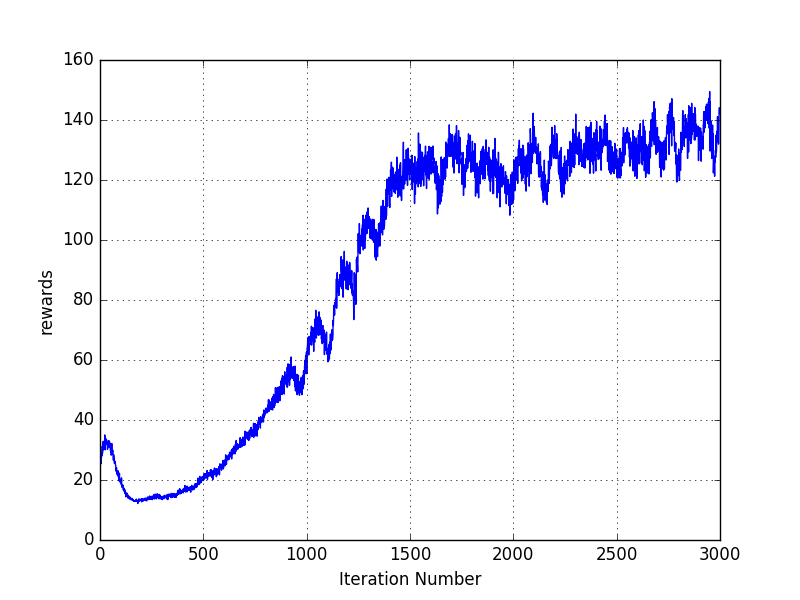

In [12]:
Image(filename="figures/run_3.png")

### Show Tensorboard

### Why did I introduce entropy?

** First Run without Entropy **

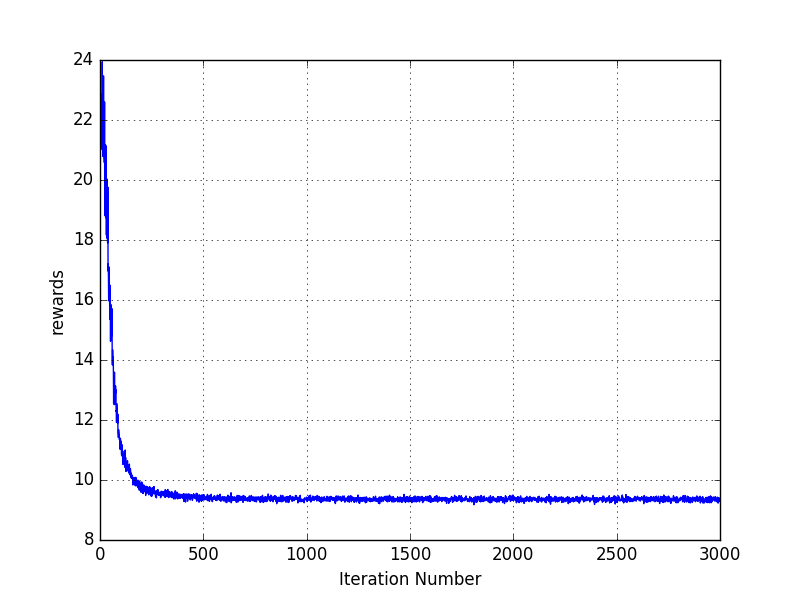

In [13]:
Image(filename="figures/run_1_without_entropy.png")

** Second Run without Entropy **

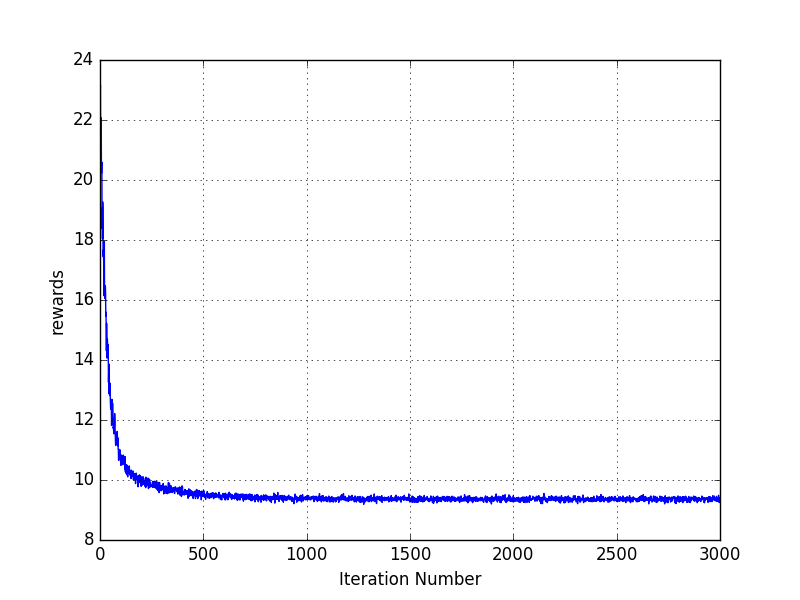

In [14]:
Image(filename="figures/run_2_without_entropy.png")

** Third Run Without Entropy **

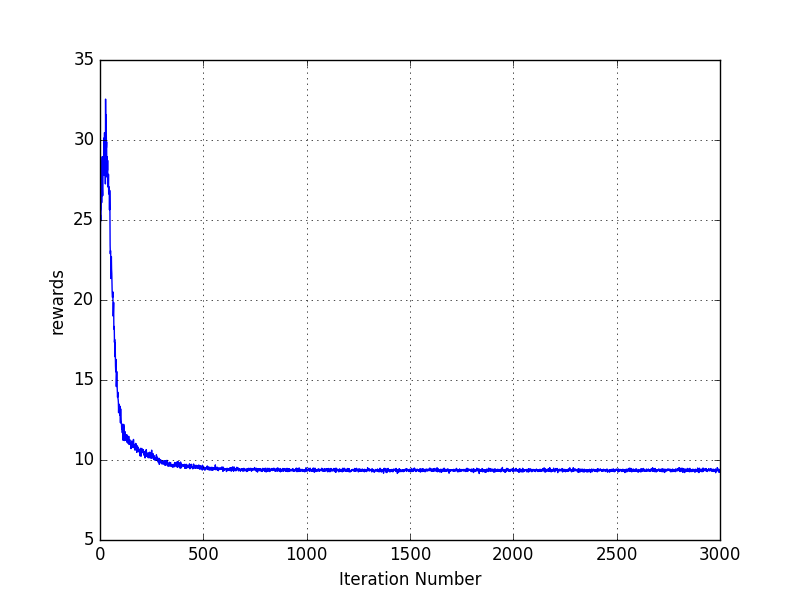

In [15]:
Image(filename="figures/run_3_without_entropy.png")

### Is it a plateu or a local minima?

1. The weights and biases are between $-2$ and $2$.
2. I am using `Adam optimizer` that can take the parameters out from a plateu.

**In coclusion, it is a local minima.** 

### What is the optimal policy in these local minima?

1. The optimal policy  is a deterministic policy.
2. In two runs, the optimal policy is to take action $0$ and in one the optimal policy is to take action $1$.

### Can you prove that a deterministic policy is a local minima for a Cartpole environment?

Actually, a deterministic policy is a global minima for the Cartpole problem that is evident from the loss function.
$$
\text{loss} = -\sum \log\pi(a \;|\; s, \theta) Q^{\pi}(s, a)
$$

If return ($R$) is always positive, the minimum value of this function is achieved when $\pi$ is a deterministic policy.

### There are some questions to discuss:

1. Why don't we reach to this global optima when we don't use DQN network for return computation?

### Things to try here

1. Use a baseline funciton
2. Reduce the entropy bounus as a function of training iteration
3. Use annealing with learning rate